# Swapnil Mohite
# Task 1- Prediction Using Supervised Machine Learning Algorithm
Objective:- To predict the Score in exam if student study for 9.25 hours in a day

# Simple Linear Regression
In this regression task we will predict the scores of the student based on the number of hours they study Here predict variable is Score and Response Variable is Hours Of study

In [1]:
import pandas as pd     #import library

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn import metrics

In [7]:
import seaborn as sns

In [8]:
from scipy import stats

In [9]:
#import the dataset
data=pd.read_csv(r'C:\Users\smohite\Downloads\Excel Reports\GRIP\student_scores - student_scores.csv')

In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [12]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
data.shape

(25, 2)

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 440.0 bytes
None


In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualisation

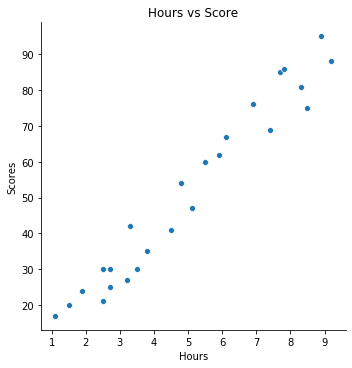

From the above Scatter plot we can see that there exist a linear relationship between the variables


In [16]:
sns.relplot(x='Hours',y='Scores',data=data)   #visualization od data
plt.title("Hours vs Score")
plt.show()
print("From the above Scatter plot we can see that there exist a linear relationship between the variables")

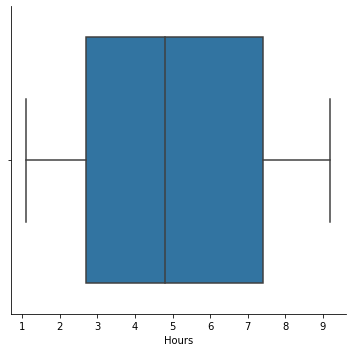

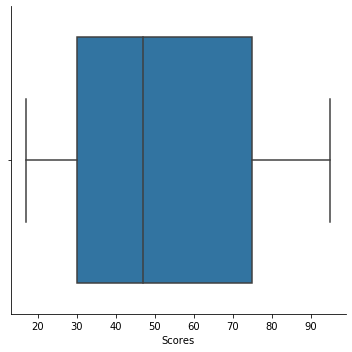

In [17]:
sns.catplot("Hours",data=data,kind='box')
sns.catplot("Scores",data=data,kind='box')

In [18]:
cor=data.corr()

In [19]:
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


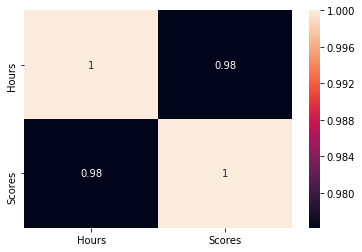

In [20]:
sns.heatmap(cor,annot=True)
plt.show()

From Above Heatmap and Cor table we clearly see that the strong positive correlation between Hours and scores

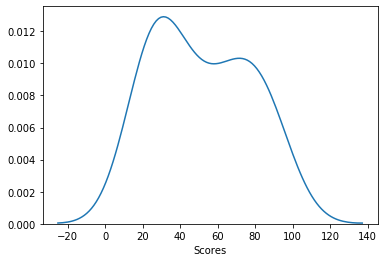

In [21]:
import seaborn as sns
sns.distplot(data['Scores'],hist=False)      #plotting distribution of score of the data

From above Kde plot we can see that Score distributed normally

# Preparing the Data

In [22]:
X = data.iloc[:, :-1].values

In [23]:
y = data.iloc[:, 1].values

# Train Test Split

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print(f"The size of the train data and test data is{X_train.size,y_train.size,X_test.size,y_test.size}")

The size of the train data and test data is(20, 20, 5, 5)


In [29]:
print("Training complete.")

Training complete.


In [30]:
reg=LinearRegression()

In [31]:
model=reg.fit(X_train,y_train)

In [32]:
print(model.coef_),print(model.intercept_)

[9.91065648]
2.018160041434669


(None, None)

# The Best fit of the Line is Score=2.018 + 9.912 * Hours
# Plotting the Model

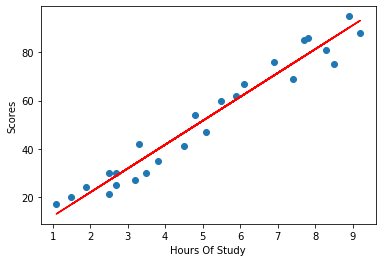

In [33]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.xlabel("Hours Of Study")
plt.ylabel("Scores")
plt.show()

# Prediction

In [34]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Step 7 - Comparing Actual result to the Predicted Model result

In [35]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [36]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105355


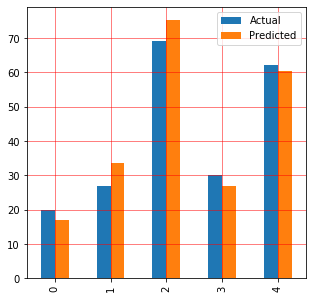

In [37]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [38]:
import numpy as np
Hours=9.25
predict_Score=model.predict([[Hours]])
predict_Score
print('Number of Hours=9.25')
print("predict Score=",format(predict_Score[0]))

Number of Hours=9.25
predict Score= 93.69173248737538


In [39]:
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test,y_pred)),3)
print('Mean Squared Error:',round(metrics.mean_squared_error(y_test,y_pred)),3)
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.0 3
Mean Squared Error: 22.0 3
Root Mean Squared Error: 4.647
R-2: 0.9454906892105355


The value of root mean squared error is 4.647 which is less than 10% of the mean of percentage of all the student(51.48)

# Here R -Squared = 0.9454 means the model explain 94.54% of the variability in the dependent variable(Score) by Independent variable(Hours)
# Thank You